<a href="https://colab.research.google.com/github/diegopescoalcalde/portfolio/blob/master/Churn_Prediction_for_Telecom_Company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Customer Retention for Telecom Company**
---
*by [Diego Pesco Alcalde](https://www.linkedin.com/in/diegopesco/)*

<br>

![texto do link](https://survicate.com/wp-content/uploads/2019/12/customer-churn.png)

<br>

Marketing has been one of the most important business areas for a long time. Companies invest constantly a considerable portion of their revenues to make their brands visible, generate demand and attract their customers. The negative side is that marketing costs are high, and it is difficult to keep a profitable business when all customers are coming from marketing channels. To increase profit margins companies have been recently exploring subscription business models, where marketing is invested to attract long-term customers that will remain loyal and contribute much more to the financial results. 

The challenges of this new strategy scenario is to deliver consistent long-term results to customers with different perspectives and needs. That has driven the attention (and the investments) that previously was focused on marketing to the customer success area. Customer success teams must detect the clients' difficulties and needs and address them quickly to make sure that these clients will not cancel their subscriptions (what is called a "Churn"). These teams spend a long time in close contact with their customers to identify pain points and report to quality, product and management teams. But in the past decade they have also benefited from data science solutions to identify additional points that the customers were usually not be able to communicate (or did not know that were relevant). Today in high-tech companies most product optimizations are driven by customer success teams that investigate patterns in the customer profiles and usage, and improve people's experiences with the product even before they communicate that need. If you have already received a call with a "special benefit" from a company you are subscribed to, or at some point thought that some companies really "read your mind" with their new solutions, be aware that they probably read your data instead.

This project is an analysis of customer data of a Telecommunications company that was publicly provided on the Internet. I will analyze it from the perspective of a customer success team and try to identify important information to improve the customer retention and reduce churns in the company.

<br>

If you are reading in Github, for a full experience with all interactive charts read it in the Google Colab notebook (option available at the top of the page).

<br>



## Data Collection and Pre-processing



I start the study importing the libraries in Python and the dataset. The dataset is available in this [link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).


In [49]:
# Filter warnings

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)


In [50]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import plotly.express as px
import plotly.graph_objects as go

# Statistical Testing Libraries

from scipy.stats import chi2_contingency

# Machine Learning Libraries

from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report, plot_confusion_matrix, precision_recall_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler
# from sklearn.pipeline import make_pipeline, Pipeline
from imblearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier, plot_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Seaborn Style Graphs
sns.set()
sns.set_style("dark")


In [51]:
# Create random seed to guarantee reproducibility

np.random.seed(0)

In [52]:
# File path

# https://raw.githubusercontent.com/IBM/employee-attrition-aif360/master/data/emp_attrition.csv

file_path = 'https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv' #@param {type:"string"}

# Import data in a dataset
df = pd.read_csv(file_path)

Then I do a quick check to see if the dataset looks ok and what sort of information can be found in it.

In [53]:
# Reproduce dataset initial and last rows
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


There is a total of 21 features in the dataset, which will be explained during the analysis. What is important for the moment is that each row has data of one specific customer, and in the last column the information of whether this customer cancelled or not his plan with the company. So in summary we have information of customers that cancelled and customers that did not cancel, to analyze the different patterns among them.

Now let's check a summary of the dataset structure.

In [54]:
# Show a summary of dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


There are 7043 entries in the dataset, and no missing values in it. Most of the data types are also correct to proceed with the analysis, but some of them need to be adjusted.

In [55]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The variable `TotalCharges` has a few missing values, which we will replace with the median of the series.

In [56]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Let's print the columns' names in a list, this will be useful to create the dropdown lists soon.

In [57]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

The dataset is now clean and ready to be analyzed.

## Practical Analysis

The practical analysis is the first step in any study and is important to understand if the data available makes sense from a practical perspective. Many problems can be solved using simple methods and visualizations in practical analysis, and the results obtained in this section are helpful to generate theories for other steps of the study.

The main objective of this analysis will be to investigate the variable of churn and find out patterns of employees that cancelled their plans with the company. Based on these patters we can develop theories of causality and business strategies to reduce the churn rates.

I will start checking the distribution of the variables. That distribution is visible using distribution plots, and any interesting insight can be tested for significance using relevant statistical testing methods. They will confirm if some of the input variables have significant impact in the response variable.

In [58]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [59]:
df.describe(include='O')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7925-PNRGI,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [60]:
#@title Distribution of data

feature = 'SeniorCitizen' #@param ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents','tenure', 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
split_by= 'Churn' #@param ['Churn']

fig = px.histogram(df, 
       x=feature,
       marginal = 'box',
       hover_data = ['customerID','PhoneService', 'InternetService', 'MonthlyCharges', 'TotalCharges'],
       color = split_by
      )

fig.write_image("fig.png")

ValueError: ignored

In [ ]:
#@title Chi-square significance test

feature = 'SeniorCitizen' #@param ['gender', 'SeniorCitizen', 'Partner', 'Dependents','tenure', 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod']

CrossTab = pd.crosstab(index = df[feature], columns = df['Churn'])

print()
print(feature)
display(CrossTab)
print()
display(chi2_contingency(CrossTab))

The first important information is that while doing the analysis of all interest variables mentioned below, I didn't find any critical outlier which I thought that should be removed. This is also unusual in terms of dataset integrity, but not impossible, since there aren't so many entries.

I analyzed all the variables independently and their relation with the response variable (Churn). There are some interesting observations from the data distribution.

1. `SeniorCitizen`

Even though the quantity of senior citizens that have subscription plans is lower than 1/3 of the total, they represent almost half of the churns in the dataset. Is it normal that senior people cancel plans more easily, or is the company (not) doing something that impacts them more?

The difference was confirmed as statistically significant by a chi-squared test.

2. `InternetService`

There is a clear difference between the churn rates of clients with and without Internet services. One of the theories for that is that the main reason for the churn is the Internet service itself, specially the fiber optic.

The difference was confirmed as statistically significant by a chi-squared test.

3. `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`

The vast majority of the clients that cancelled their plans did not have online security, device prorection or backup service. This is a sign that the online security service is being effective. So most of the customers that cancelled could have had security issues with their connections, and didn't have backups. Apparently offering a discount in this service would not only enhance cross-sales but could also help in churn rate reduction.

The difference of all four variables was confirmed as statistically significant by a chi-squared test.

4. `Contract`

As expected, clients that have monthly payment contracts have higher cancelling rates. These are people that usually are starting a service but want to test it before moving to longer-term plans. But it is also good to see that the company is able to sell a high number of long-term contracts. What the company can do with a little more data is to check which customers changed from the short to long-term plan, and find out patterns in them. This can help the company to incentivate more and more customers to migrate to longer subscriptions.

The difference was confirmed as statistically significant by a chi-squared test.

5. `PaymentMethod`

Users that pay with electronic check have much higher churn rates than the others. This could be caused by problems in this specific payment method or a higher cost due to the payment method. A deeper study can be done with them to understand why that is happening, for example by checking if customer complaints are frequent about that in the customer service department.

The difference was confirmed as statistically significant by a chi-squared test.

6. `MonthlyCharges`, `TotalCharges`

It seems that customers that cancelled had slightly higher monthly charges in average, probably because they were mostly part of the monthly payment contracts. We also saw that they did not have most of the additional products, so it seems that the difference between the monthly and annual plans are really significant. Maybe offering a discount in the first months before charging full price of the monthly plan, or at least offering the additional products for free as a "trial" period would help keeping more clients.

The total charges of each customer is naturally dependent of the monthly charges and the tenure, but it is better to work with these two variables, unless we are working to predict Lifetime Value of customers.

The results were not tested for statistic significance due to the non-normal distribution of the data (even after log transforms it was not possible to reach a normal distribution).

7. `Tenure`

Tenure in this case is the duration of a client's subscription plan. So it is evident (and expected) that clients cancel usually in the first months of their subscription. That is why companies offer long-term contracts in the first place. Even though the tenure itself does not say much about root causes for churns, it is possible to analyze separately the clients that cancelled in the first months from the ones that cancelled from a long time, and create separate strategies for each of these groups.

## Classification Model Development

This section is dedicated to the application of a classification model to the problem. That means that we will train a model using the existing data, so it is able to detect patterns of results for each class.

Please note that there are variations in the results obtained by the solvers each time the code is run, so if you run the code by yourself the results might not match fully the ones I obtained.

### Selection of the important variables

The first part of the preparation is to select which variables will be used in the modelling. This is specially important when there are features that will not be available for the new data, but can also be used in case of quasi-static features, excessive missing data, among other situations.

Let's check again the features of our dataset.

In [61]:
dfclf = df.copy()

dfclf.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

It is interesting to remove the total charges from the dataset. It is a function of monthly charges and tenure, and that can cause some collinearity in the dataset, which might impact the results.

Also the customer ID is not a relevant information to the model and needs to be removed.

In [62]:
dfclf.drop(['customerID', 'TotalCharges'], axis=1, inplace=True)

dfclf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### Transformation of categorical features

The second step in the dataset preparation is to convert the categorical features into numerical ones. This will allow more features to be considered in the model and better prediction results to be achieved.

In [63]:
dfclf = pd.get_dummies(dfclf)

dfclf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   tenure                                   7043 non-null   int64  
 2   MonthlyCharges                           7043 non-null   float64
 3   gender_Female                            7043 non-null   uint8  
 4   gender_Male                              7043 non-null   uint8  
 5   Partner_No                               7043 non-null   uint8  
 6   Partner_Yes                              7043 non-null   uint8  
 7   Dependents_No                            7043 non-null   uint8  
 8   Dependents_Yes                           7043 non-null   uint8  
 9   PhoneService_No                          7043 non-null   uint8  
 10  PhoneService_Yes                         7043 no

Now all the variables are in numeric types.

### Train-test set Split

Now we need to create the input and response variables datasets, named X and Y respectively. Also, it is important to split the dataset in training and test sets. All the development and optimization of the model is done using the training set. After that, the model is tested using the test set, as if it is fresh new data with no classification yet. To define the accuracy of the model the predicted classes are compared to the real ones in the test set.

In [64]:
# Create a matrix of input variables X and results array Y

X = dfclf.drop(['Churn_No', 'Churn_Yes'], axis=1)
Y = dfclf.Churn_Yes

# Create train and test datasets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(dfclf.shape)

(5634, 44)
(1409, 44)
(5634,)
(1409,)
(7043, 46)


We can see that the dataset is properly divided by the shapes of each individual dataset.

### Normalization

Before moving on to the prediction model, it is important to make sure that the variables are normalized. All variables that came from the One Hot Encoding transformation range between 0 and 1, while other numeric features reach much higher values. This can impact in their relevance to the final model, since their magnitude order is much larger. So the variables will be transformed to have the same range.

In [65]:
# Normalize inputs X

scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

X_train_norm

array([[-0.4397627 ,  1.61253221,  0.67415397, ..., -0.51857393,
        -0.71219598,  1.82223822],
       [ 2.27395367, -0.7479074 , -0.61489382, ..., -0.51857393,
         1.4041079 , -0.54877567],
       [-0.4397627 ,  1.57183498, -1.3350973 , ..., -0.51857393,
        -0.71219598, -0.54877567],
       ...,
       [-0.4397627 ,  1.04277093, -1.46649701, ..., -0.51857393,
        -0.71219598,  1.82223822],
       [ 2.27395367, -1.27697145,  0.16352472, ..., -0.51857393,
         1.4041079 , -0.54877567],
       [-0.4397627 , -1.15487975, -1.47814002, ...,  1.92836536,
        -0.71219598, -0.54877567]])

Now we have a normalized dataset to train the model.

### Model Selection

There are many machine learning models that can be applied to solve a problem. There are general guidelines of when to use each one, but it is highly recommended to test more than one to see which one has the best predictability for each situation. This is a classification problem, where the objective is to predict in which class a transaction will fall based on its attributes. In this example we will test and compare some of the classification models to define which will be the best option to work with.

The function below is used to test the models using the training data and a cross-validation method. The output is the score of each model for the comparison. This is a very time-consuming part, so if you run the code you will have to wait for some time until it finishes.

In [66]:
def val_model(X, y, classifier, scor, show):

  X = np.array(X)
  y = np.array(y)

  scores = cross_val_score(classifier, X, y, scoring = scor)

  if show == True:
    print("Score: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std()))
  
  return scores.mean()

In [67]:
# Create models
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
sgdc = SGDClassifier()
svc = SVC()
lr = LogisticRegression()
xgb = XGBClassifier()
lgbm = LGBMClassifier()

# Create lists to input name and results of the models

model = []
score = []

# Check score and append in lists
for classifier in (rf, dt, sgdc, svc, lr, xgb, lgbm):
    model.append(classifier.__class__.__name__)
    score.append(val_model(X_train_norm, Y_train, classifier, scor='recall', show=True))

pd.DataFrame(data=score, index=model, columns=['Recall'])

Score: 0.49 (+/- 0.02)
Score: 0.50 (+/- 0.03)
Score: 0.48 (+/- 0.12)
Score: 0.51 (+/- 0.03)
Score: 0.56 (+/- 0.03)
Score: 0.54 (+/- 0.04)
Score: 0.53 (+/- 0.03)


,Recall
RandomForestClassifier,0.491690
DecisionTreeClassifier,0.496359
SGDClassifier,0.482463
SVC,0.507677
LogisticRegression,0.556308
XGBClassifier,0.539672
LGBMClassifier,0.530328


The results of recall in general are not good. That means that the model is not being able to detect similar patterns within the data to base its prediction on.

Since most of the data available is about customers that did not cancel the subscription, the dataset is considered unbalanced. Unbalanced datasets can lead to biased model predictions in many cases, so it is important to balance the model and see if there are improvements in the results. Let's do that.

In [68]:
# Instance Under Sampler method and apply to X and Y

rus = RandomUnderSampler(random_state=0)
X_rus, Y_rus = rus.fit_sample(X_train, Y_train)

# Create Dataframe with results of Y
df_rus = pd.DataFrame(Y_rus)

# Create Dataframe with value counts of Y

counts = pd.DataFrame(df_rus.loc[:,0].value_counts())
counts.columns = ['Data Points']

# Plot values counts for each class 

px.bar(counts, x=counts.index, y='Data Points' )


It is possible to see that the transformation reduced drastically the quantity of data points to have a balanced dataset. But what is more important? To have more data or to have balanced data? Let's see how the model performs with this new dataset of training.

But before we do, it is important to normalize the new dataset, since the mean and standard deviation values might have changed.

In [69]:
# Normalize inputs X

scaler_rus = StandardScaler()
X_rus_norm = scaler_rus.fit_transform(X_rus)
# X_rus_norm = scaler_rus.transform(X_rus)
X_test_norm = scaler_rus.transform(X_test)

X_rus_norm

array([[-0.48883532, -0.15259335, -0.47969959, ..., -0.46038021,
        -0.84293612,  1.90035974],
       [-0.48883532,  0.96549572, -1.66285066, ...,  2.17211769,
        -0.84293612, -0.52621616],
       [-0.48883532,  0.1372816 , -1.47347699, ...,  2.17211769,
        -0.84293612, -0.52621616],
       ...,
       [-0.48883532, -0.11118264,  0.43242128, ..., -0.46038021,
        -0.84293612, -0.52621616],
       [-0.48883532, -0.73234324,  1.15343111, ..., -0.46038021,
         1.18632951, -0.52621616],
       [ 2.04567871, -1.1050396 ,  0.08147192, ..., -0.46038021,
         1.18632951, -0.52621616]])

In [70]:
# Create models
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
sgdc = SGDClassifier()
svc = SVC()
lr = LogisticRegression()
xgb = XGBClassifier()
lgbm = LGBMClassifier()

model_rus = []
score_rus = []

# Check score
for classifier in (rf, dt, sgdc, svc, lr, xgb, lgbm):
    model_rus.append(classifier.__class__.__name__)
    score_rus.append(val_model(X_rus_norm, Y_rus, classifier, scor='recall', show=True))

pd.DataFrame(data=score_rus, index=model_rus, columns=['Recall RUS'])

Score: 0.78 (+/- 0.02)
Score: 0.67 (+/- 0.03)
Score: 0.75 (+/- 0.05)
Score: 0.81 (+/- 0.01)
Score: 0.80 (+/- 0.02)
Score: 0.81 (+/- 0.02)
Score: 0.78 (+/- 0.01)


,Recall RUS
RandomForestClassifier,0.780159
DecisionTreeClassifier,0.672239
SGDClassifier,0.753535
SVC,0.808135
LogisticRegression,0.798131
XGBClassifier,0.812811
LGBMClassifier,0.780826


The result of Recall improved significantly for all the models using the balanced dataset. Based on the results we can choose now a model to use. I will choose the XGBClassifier because of its score and diversity of parameters that can be tuned to improve the results even more.

### Hyperparameter Tuning

Machine Learning models have important parameters that define how it they will learn and predict results. Different parameters lead to different models and consequently different results. Due to the complexity of the models there is no analytical method to define which combination of parameters will provide the best results. Hyperparameter tuning is an iterative way in which the computer will test different parameter combinations and calculate scores to define the best combination.

Let's test some combinations of parameters of the model and see if we find a combination that can improve these results even more. Please note that the objective of the article is not to reach the global optimum score result, as this requires an extensive work and computational time. We will run a quick grid search for the sake of explanation.

In [71]:
# Instance model

xgb = XGBClassifier(random_state=0)

# Define parameter grid to be tuned

param_grid = {
    'learning_rate':[0.01, 0.1, 1],
    'max_depth':[2, 4, 6],
    'min_child_weight':[1, 3, 5]
}

# Define folding method and quantity of folds

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state = 0)

# Run grid search

grid_search = GridSearchCV(xgb, param_grid, scoring='recall', n_jobs=-1, cv=kfold)
grid_search.fit(X_rus_norm, Y_rus)

# Store all results in a Dataframe and print best result

score = pd.DataFrame(grid_search.cv_results_['mean_test_score'])
params = pd.DataFrame(grid_search.cv_results_['params'])
cvresults = pd.concat([params, score], axis=1)
cvresults.columns = ['learning_rate',	'max_depth',	'min_child_weight',	'mean_test_score']

print('Best score: {} for {}'.format(grid_search.best_score_, grid_search.best_params_))

Best score: 0.8587906976744186 for {'learning_rate': 0.01, 'max_depth': 2, 'min_child_weight': 1}


In [72]:
# Print cross-validation results dataframe

# cvresults


The results of recall improved significantly with the tuning. Another possible analysis is the importance of each feature in the classification process.

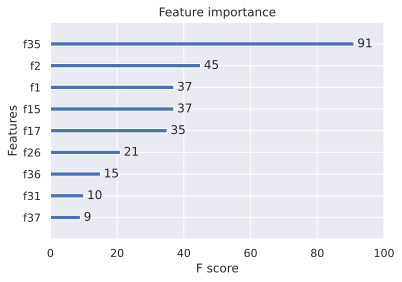

In [73]:
# Instance and fit model

xgb = XGBClassifier(learning_rate=0.01, max_depth=2, min_child_weight=1, random_state=0)
xgb.fit(X_rus_norm, Y_rus)

# Plot the importance of the most important features

plot_importance(xgb)
plt.show()



By seeing the feature importance it is possible to reduce drastically the quantity of features in the model, increasing speed and reducing the risks of overfitting.

We start checking the results of cross validation from the original model.

In [74]:
# Get cross validation results from original model

result = cross_val_score(xgb, X_rus_norm, Y_rus, cv=kfold)
result

array([0.7703827 , 0.73377704, 0.76166667, 0.74666667, 0.735     ])

These are our reference values. Now we can reduce the number of features in the model and see how the cross validation score will be.

In [75]:
# Select only most important features from training set

X_train_red = X_train.iloc[:,[35,2,1,15,17,26]]

# Instance Under Sampler method and apply to X and Y

rus = RandomUnderSampler(random_state=0)
X_rus, Y_rus = rus.fit_sample(X_train_red, Y_train)

# Normalize inputs X

scaler_rus = StandardScaler()
X_rus_norm = scaler_rus.fit_transform(X_rus)

# Instance and fit model

xgb = XGBClassifier(learning_rate=0.01, max_depth=2, min_child_weight=1, random_state=0)
xgb.fit(X_rus_norm, Y_rus)

# Get cross validation result for reduced model

result = cross_val_score(xgb, X_rus_norm, Y_rus, cv=kfold)
result

array([0.7687188 , 0.73211314, 0.76333333, 0.755     , 0.735     ])

We can see that the reduction of dimensionality has almost not affected the results.

Then it is possible to move on to model validation.

### Model Validation

This is the step when the obtained model is trained with the data and tested with the test data to validate its accuracy.

              precision    recall  f1-score   support

           0       0.92      0.60      0.72      1041
           1       0.43      0.85      0.57       368

    accuracy                           0.66      1409
   macro avg       0.67      0.72      0.64      1409
weighted avg       0.79      0.66      0.68      1409



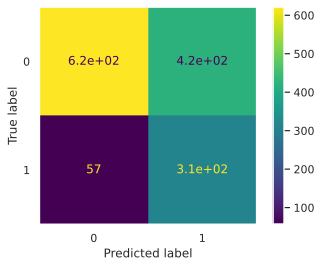

In [76]:
# Remove features not used in model also in test set

X_test_red = X_test.iloc[:,[35,2,1,15,17,26]]

# Normalize test set

X_test_norm = scaler_rus.transform(X_test_red)

# Predict results

Y_pred = xgb.predict(X_test_norm)

# Create classification report

print(classification_report(Y_test, Y_pred))

# Plot confusion matrix

plot_confusion_matrix(xgb, X_test_norm, Y_test)
plt.show()


An interesting phenomena can be observed. The classification report shows a small precision for class 1. Let me explain precision and recall below.

* Precision - A precision of 0.43 means that when the model predicts that customer will cancel the subscription, 43% of the times it will really be, and in 56% of the times it will be a false positive.

* Recall - The model will be able to predict 85% of all churns, what means that only 15% of the churns will not be predicted by the model.

I hope it is clearer now with the practical application of the scores.

A precision that low can actually generate issues to the company, since it would be basically detecting many false alarms, what can cost time and additional expenses in personnel or benefits to customers. A way to find a good balance is to analyze the precision-recall curve. 

In summary, classification models actually calculate what is the probability that an input is from one or the other class, and classify it based on a reference probability, called threshold. So if the threshold is 50%, when the probability that a data point belongs to a class is 51% it will be classified in that group.

In practical terms, that means that if the model calculates a 51% probability that a churn will happen, it will already predict a churn to happen. But we can set the model to only predict churns that have 75% or 80% chance of happening for example, and reduce the quantity of false alarms.

If we do not define a threshold the model chooses it by itself, and in many cases this might not be the best option. In a precision-recall curve it is possible to see the results of these two metrics for different threshold values, and then choose the one that has the best balance to implement. Let's do that below.

In [77]:
# Get prediction probability of each class

Y_proba = xgb.predict_proba(X_test_norm)

# Keep probabilities for class 1 only

Y_proba = Y_proba[:, 1]

# Create a dataframe with precision and recall for each threshold

curve = pd.DataFrame(precision_recall_curve(Y_test, Y_proba)).transpose()
curve.columns = ['precision', 'recall', 'threshold']

# Create a precision and recall curve of class 1 to see the results for different thresholds

px.line(curve, x='recall', y='precision', hover_data=['threshold'])

As we can see, there are different combinations of precision and recall for different threshold values. Let's take a threshold of 60% to see how results are.


In [78]:
# Create new classification with predefined threshold

y_pred_adj = (xgb.predict_proba(X_test_norm)[:,1] >= 0.60).astype(bool)

# Print classification report

print(classification_report(Y_test, y_pred_adj))


              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1041
           1       0.57      0.65      0.61       368

    accuracy                           0.78      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.78      0.79      1409



The results are a little more balanced, so there would be less false positives but also less real churns would be identified. Naturally there are many other optimization steps that can be applied, but they are not within the scope of this article.

Now there are different possibilities to choose the final model configuration and decide for a more rigid system (with a higher recall rate) or a more flexible one (that will also take precision into account). This has to consider the size of the customer success team, number of clients that the company has and the financial impact of losing a client.

But what is the financial impact of losing a client? Some people say that it is the marketing cost associated to bring a new one, but other people (including me) like to think of it as the revenue that the average customer brings to the company. This is called Customer Lifetime Value, and we will talk about it in a second.

First, we can condense all the data preparation and prediction with the trained model in a pipeline, which will be ready to be deployed into production.

### Pipeline

              precision    recall  f1-score   support

           0       0.92      0.60      0.72      1041
           1       0.43      0.85      0.57       368

    accuracy                           0.66      1409
   macro avg       0.67      0.72      0.64      1409
weighted avg       0.79      0.66      0.68      1409



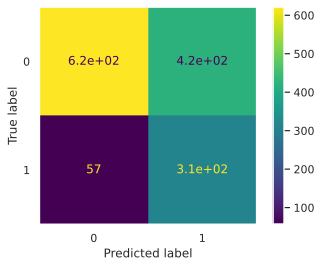

In [79]:
# Create pipeline

pipe = Pipeline(steps=[('scaler_rus', scaler_rus), ('xgb', xgb)])

# Fit pipeline to training set

pipe.fit(X_rus, Y_rus)

# Check cross validation score

result = cross_val_score(pipe, X_rus, Y_rus, cv=kfold)

# Predict Y

Y_pred = pipe.predict(X_test_red)

# Create classification report

print(classification_report(Y_test, Y_pred))

# Plot confusion matrix

plot_confusion_matrix(pipe, X_test_red, Y_test)
plt.show()

The results of the pipeline match the ones of the original model, so it is ready to be exported or deployed into production.

## Customer Lifetime Value (LTV) Prediction

With the previous model we were able to predict cases of churns and act before they happen to improve the financial results of the company. But how to measure the losses coming from churns? The best reference is customer lifetime value. 

Customer lifetime value is an estimation of the potential revenues that each customer can bring to the company. This helps to measure the impact of clients coming and going away and can drive much better the decisions within a company. So how to calculate that?

The first method is to calculate the mean revenue per customer and use that reference for all customers. That is a good start and is surely better than no metric at all. But there are considerable differences in the revenues coming from one or other client. So to get a more precise estimative we can split customers in groups of Low, Mid and High LTV, and predict what will be the LTV of new customers based on their attributes.

Let's do that and see if we can get useful information from it.

### Feature Selection

The first important point is to define which are the most relevant variables to clusterize by. In this case since the only relevant feature is `TotalCharges`


In [80]:
# Create dataset with relevant features

dfclu = df[['TotalCharges']].copy()

dfclu



,TotalCharges
0,29.85
1,1889.50
2,108.15
3,1840.75
4,151.65
...,...
7038,1990.50
7039,7362.90
7040,346.45
7041,306.60


### Clusterization

The objective is to create three groups of LTV so for that we can use Machine Learning Clustering models. These models identify similar patterns in the input variables to group the data. In this case we will use a KMeans clustering model and create 3 clusters. based only on the Total Charges.

In [81]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=0)
kmeans.fit(dfclu)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

### Clusters Analysis

With the clusters created we can calculate the mean LTV of each of them, and plot the results in a chart.

In [82]:
df['Clusters'] = kmeans.labels_
clusters = df.groupby(['Clusters'])['TotalCharges'].describe()
clusters

,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0,4154.0,682.854700,567.733867,18.80,161.450,534.875,1135.3375,1952.25
1,1279.0,6268.911767,1013.644373,4741.45,5438.325,6130.850,7030.9750,8684.80
2,1610.0,3240.387795,808.583975,1952.80,2517.750,3183.175,3946.3000,4740.00


In [83]:
px.scatter_3d(df,
           x= 'TotalCharges',
           y= 'tenure',
           z= 'MonthlyCharges',
           color = 'Clusters',
          #  hover_data=['MonthlyIncome']
)

Now the customers are divided in the following groups:

* Low LTV - 4154 customers of LTV U\$682.85
* Mid LTV - 1610 customers of LTV U\$3240.38
* High LTV - 1279 customers of LTV U\$6268.91

An interesting possibility at this point is to analyze the patterns of each group, and find which are the profiles of clients of High LTV. This can help in Marketing campaigns to attract more customers with the same profile. 


In [84]:
px.parallel_categories(df, width = 2000, color='Clusters')

The clusters are well distributed in the demographic data, but it is possible to see that all customers that take only phone service don't spend enough to reach mid and high LTVs. This is expected since all additional services that bring additional revenue are related to the internet service.

We can see also that customers that use Mailed check as their payment form are usually part of Low and Mid LTV groups.

Surely with more post-processing we can reach more conclusions, but let's focus in the prediction model for now. It will take the basic features of a customer when he/she signs the contract and predict what is the overall LTV of that customer.

We will go straight to a XGBoost model now to focus more on the conclusions.

In [85]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Clusters'],
      dtype='object')

              precision    recall  f1-score   support

           0       0.93      0.79      0.86       838
           1       0.76      0.86      0.81       252
           2       0.52      0.67      0.59       319

    accuracy                           0.78      1409
   macro avg       0.74      0.77      0.75      1409
weighted avg       0.81      0.78      0.79      1409



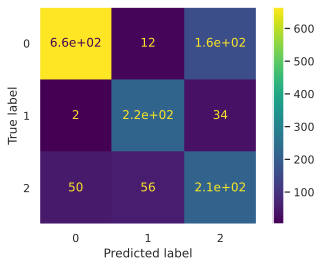

In [86]:
# Create a copy of the original dataset removing the unnecessary features

dfclf = df.drop(['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], axis=1)

# Create dummy variables from the categorical ones

dfclf = pd.get_dummies(dfclf)

# Create a matrix of input variables X and results array Y

X = dfclf.drop(['Clusters'], axis=1)
Y = dfclf.Clusters

# Create train and test datasets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Instance Under Sampler method and apply to X and Y

rus = RandomUnderSampler(random_state=0)
X_rus, Y_rus = rus.fit_sample(X_train, Y_train)

# Normalize inputs X

scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_rus)
X_test_norm = scaler.transform(X_test)

# Instance and fit model

xgb = XGBClassifier(random_state=0)
xgb.fit(X_train_norm, Y_rus)
Y_pred = xgb.predict(X_test_norm)

# Create classification report

print(classification_report(Y_test, Y_pred))

# Plot confusion matrix

plot_confusion_matrix(xgb, X_test_norm, Y_test)
plt.show()

The results show that the model is able to predict well the average LTV of a customer in 77% of the cases by the time they start a subscription. That is a powerful information to marketing, customer success and financial teams, which can better plan their strategies based on that. Again, that model can be further optimized using different machine learning techniques, as well as more data, but this is not within the scope of this article.

# Conclusion

In this notebook I did the analysis of data about a Telecom company to develop strategic insights for the teams.

Already in the exploratory analysis a lot of information could be captured about customer behavior and patterns. There seems to be a relation between the services that users hire and their loyalty to the company. Also, two machine learning models were created. The first model was a classifier that predicts with a reasonable accuracy when a customer will cancel his/her subscription. The second is a clustering model that grouped customers in three groups based on their Lifetime Value, so that marketing and customer success teams can focus their efforts on the best opportunities and provide customized solutions for their clients.

This analysis can be the starting point to many different strategies and projects within a company, depending on which objective it wants to achieve. It is also important to state that it is not a difficult data to obtain. In fact companies usually hold much more data about their customers so the analysis and models developed can go even deeper and find more patterns than the ones explored here. So there is no added effort in terms of data collection, which is usually the most expensive and time consuming part. It is a matter of getting the data prepared and analyzing it the right way.